In [2]:
import pandas as pd 
import psycopg2
import matplotlib.pyplot as plt
from config import db_params  # Import the db_params from the external config module

try:
    conn = psycopg2.connect(
        **db_params
    )
    print("Connection established")
except Exception as error:
    print(error)

Connection established


   transaction_date   amount
0        2007-02-14   116.73
1        2007-02-15  1188.92
2        2007-02-16  1154.18
3        2007-02-17  1188.17
4        2007-02-18  1275.98
..              ...      ...
85       2007-05-10        0
86       2007-05-11        0
87       2007-05-12        0
88       2007-05-13        0
89       2007-05-14   514.18

[90 rows x 2 columns]


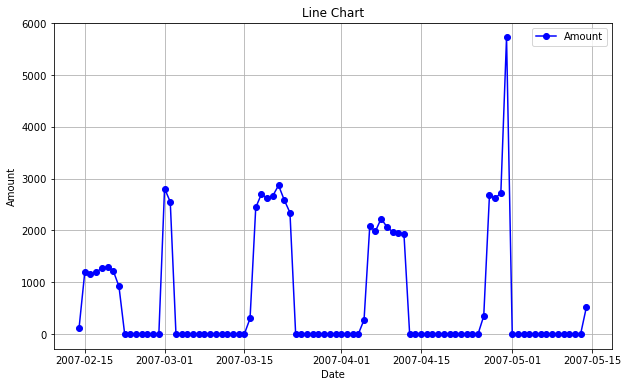

In [3]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
        **db_params
)

# Create a cursor to execute SQL queries
cursor = conn.cursor()

# Write a SQL query to retrieve the data
query = "SELECT transaction_date, sum(amount) as amount FROM public_test.customerpayments group by transaction_date"

cursor.execute(query)
data = cursor.fetchall()

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=['transaction_date', 'amount'])

# Convert the 'transaction_date' column to datetime64[ns]
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Sort the data by 'transaction_date'
grouped_data = df.sort_values(by='transaction_date')

# Create a date range that covers the desired time period
date_range = pd.date_range(start=grouped_data['transaction_date'].min(), end=grouped_data['transaction_date'].max(), freq='D')

# Create a DataFrame with the complete date range
complete_data = pd.DataFrame({'transaction_date': date_range})

# Left-join your existing data to the complete date range and fill missing values with 0
merged_data = complete_data.merge(grouped_data, on='transaction_date', how='left').fillna(0)

# Now, 'merged_data' contains all dates and the associated values with 0 for missing dates
print(merged_data)

plt.figure(figsize=(10, 6))
plt.plot(merged_data['transaction_date'], merged_data['amount'], marker='o', linestyle='-', color='b', label='Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Line Chart')
plt.legend()
plt.grid()
plt.show()

# Close the database connection
conn.close()
